# IMPORTING DATA AND LIBRARIES

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df=pd.read_csv('House Price India.csv')

In [8]:
df

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


# checking for null vals

In [22]:
df.isnull().sum()

id                           0
Date                         0
number of bedrooms           0
number of bathrooms          0
living area                  0
lot area                     0
number of floors             0
waterfront present           0
number of views              0
condition of the house       0
grade of the house           0
area_house                   0
area_base                    0
Built Year                   0
Renovation Year              0
Postal Code                  0
Lattitude                    0
Longitude                    0
living_area_renov            0
lot_area_renov               0
Number of schools nearby     0
Distance from the airport    0
Price                        0
dtype: int64

In [14]:
df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'area_house', 'area_base', 'Built Year', 'Renovation Year',
       'Postal Code', 'Lattitude', 'Longitude', 'living_area_renov',
       'lot_area_renov', 'Number of schools nearby',
       'Distance from the airport', 'Price'],
      dtype='object')

In [13]:
df=df.rename(columns={'Area of the house(excluding basement)':'area_house','Area of the basement':'area_base'})

In [35]:
df[df['waterfront present']>0].shape

(112, 23)

# what to keep and remove
- In my opinion the Number of views does not effect the price of house and I also though that our dataset has houses with zero water front so it wont effect the pricee but it is certainly not true
- On further inspection we see 'Date' column just tells the date of data entry which is also not required
- Morevover living area renovated and basement area renovated does not hold value as house renovated year is already considered, so the area renovated will lead to complications
- As the data is bit misleading with latitutes and longitutes, as in map it shows the location for canada so we will drop it but we are actually doing for india.
- As the postal codes read for gurugram so we will consider it as EDA and price predictor for houses in Gurugram.
- From our analysis and graph it is clear that houses with basement can be safelyy removed as what it matters that it how much of useable area our land have so we drop it too.
- Also ID has nothing to do with price too.
- we replace built and renovation year with last worked on year that way we just need to see when the building was latest renovated or worked on

In [40]:
df['Date']=pd.to_datetime(df['Date']).dt.date

In [41]:
df['Date']

0        1970-01-01
1        1970-01-01
2        1970-01-01
3        1970-01-01
4        1970-01-01
            ...    
14615    1970-01-01
14616    1970-01-01
14617    1970-01-01
14618    1970-01-01
14619    1970-01-01
Name: Date, Length: 14620, dtype: object

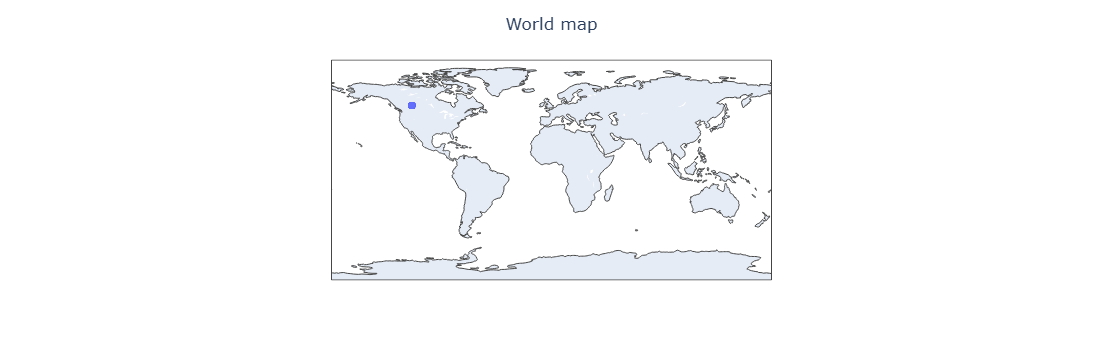

In [56]:
import plotly.express as px
fig = px.scatter_geo(df,lat='Lattitude',lon='Longitude', hover_name="id")
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()

In [109]:
dfn.loc[dfn['Renovation Year'] > 0, 'Built Year'] = dfn['Renovation Year']

In [116]:
dfn=dfn.rename(columns={'Built Year':'Last worked on in'})

In [112]:
dfn=df.drop(['number of views','Date','living_area_renov','lot_area_renov','Lattitude','Longitude','area_house', 'area_base','id','Renovation Year'],axis='columns')

In [117]:
dfn.columns

Index(['number of bedrooms', 'number of bathrooms', 'living area', 'lot area',
       'number of floors', 'waterfront present', 'condition of the house',
       'grade of the house', 'Last worked on in', 'Postal Code',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

# Final Dataset after cleaning

In [118]:
dfn.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,condition of the house,grade of the house,Last worked on in,Postal Code,Number of schools nearby,Distance from the airport,Price
0,5,2.50,3650,9050,2.0,0,5,10,1921,122003,2,58,2380000
1,4,2.50,2920,4000,1.5,0,5,8,1909,122004,2,51,1400000
2,5,2.75,2910,9480,1.5,0,3,8,1939,122004,1,53,1200000
3,4,2.50,3310,42998,2.0,0,3,9,2001,122005,3,76,838000
4,3,2.00,2710,4500,1.5,0,4,8,1929,122006,1,51,805000


In [119]:
dfn.columns

Index(['number of bedrooms', 'number of bathrooms', 'living area', 'lot area',
       'number of floors', 'waterfront present', 'condition of the house',
       'grade of the house', 'Last worked on in', 'Postal Code',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

# Using models to predict

In [120]:
X = dfn.drop(['Price'], axis=1)
y = dfn['Price']  

- now we will remove and change problematic columns with values that may confuse the model

In [ ]:
X = pd.get_dummies(X, columns=['Postal Code'], drop_first=True)

In [124]:
feature_columns = X.columns.tolist()

In [125]:
X

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,condition of the house,grade of the house,Last worked on in,Number of schools nearby,...,Postal Code_122063,Postal Code_122064,Postal Code_122065,Postal Code_122066,Postal Code_122067,Postal Code_122068,Postal Code_122069,Postal Code_122070,Postal Code_122071,Postal Code_122072
0,5,2.50,3650,9050,2.0,0,5,10,1921,2,...,False,False,False,False,False,False,False,False,False,False
1,4,2.50,2920,4000,1.5,0,5,8,1909,2,...,False,False,False,False,False,False,False,False,False,False
2,5,2.75,2910,9480,1.5,0,3,8,1939,1,...,False,False,False,False,False,False,False,False,False,False
3,4,2.50,3310,42998,2.0,0,3,9,2001,3,...,False,False,False,False,False,False,False,False,False,False
4,3,2.00,2710,4500,1.5,0,4,8,1929,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,2,1.50,1556,20000,1.0,0,4,7,1957,3,...,False,False,False,True,False,False,False,False,False,False
14616,3,2.00,1680,7000,1.5,0,4,7,1968,3,...,False,False,False,False,False,False,False,False,False,True
14617,2,1.00,1070,6120,1.0,0,3,6,1962,2,...,False,False,False,False,False,False,False,False,False,False
14618,4,1.00,1030,6621,1.0,0,4,6,1955,3,...,False,False,False,False,False,False,False,False,False,False


In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# RandomForest

In [129]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [130]:
model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=300, random_state=42)

In [131]:
y_pred = model.predict(X_test)
print("R^2 Score:", r2_score(y_test, y_pred))

R^2 Score: 0.8398953446351375


# Extra Trees

In [132]:
from sklearn.ensemble import ExtraTreesRegressor

In [134]:
model2 = ExtraTreesRegressor(
    n_estimators=500,
    max_features="sqrt",   # √p features per split
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1,
)
model2.fit(X_train, y_train)


ExtraTreesRegressor(max_features='sqrt', min_samples_leaf=2, n_estimators=500,
                    n_jobs=-1, random_state=42)

In [137]:
preds  = model2.predict(X_test)
print("R^2 Score:", r2_score(y_test, preds))

R^2 Score: 0.8338291032243604


# Gradient Boost

In [138]:
from sklearn.ensemble import GradientBoostingRegressor

In [139]:
model3= GradientBoostingRegressor(n_estimators=300,learning_rate=0.1,max_depth=4,random_state=42)
model3.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=300, random_state=42)

In [140]:
preds  = model3.predict(X_test)
print("R^2 Score:", r2_score(y_test, preds))

R^2 Score: 0.8591049858059361


# Linear Regression

In [141]:
from sklearn.linear_model import LinearRegression

In [143]:
model4 = LinearRegression()
model4.fit(X_train, y_train)

LinearRegression()

In [144]:
preds  = model4.predict(X_test)
print("R^2 Score:", r2_score(y_test, preds))

R^2 Score: 0.8213046664881325


# Which One to use further?
- Used AI here for definining the predictor function
- as we have already trained and checked few of the modes, thebest model output is given by Gradient boost with 86% accuracy so we will use it for prediction

In [ ]:
def predict_price(
    bedrooms,
    bathrooms,
    living_area,
    lot_area,
    num_floors,
    waterfront_present,
    condition,
    grade,
    last_worked_year,
    postal_code,
    schools_nearby,
    distance_airport,
):
    x = np.zeros(len(feature_cols))
    col_idx = feature_cols.index
    x[col_idx('number of bedrooms')]        = bedrooms
    x[col_idx('number of bathrooms')]       = bathrooms
    x[col_idx('living area')]               = living_area
    x[col_idx('lot area')]                  = lot_area
    x[col_idx('number of floors')]          = num_floors
    x[col_idx('waterfront present')]        = waterfront_present
    x[col_idx('condition of the house')]    = condition
    x[col_idx('grade of the house')]        = grade
    x[col_idx('Last worked on in')]         = last_worked_year
    x[col_idx('Number of schools nearby')]  = schools_nearby
    x[col_idx('Distance from the airport')] = distance_airport
    dummy_col = f"Postal Code_{postal_code}"
    if dummy_col in feature_cols:
        x[col_idx(dummy_col)]=1
    x_scaled = scaler.transform([x])
    return model3.predict(x_scaled)[0]